<a href="https://colab.research.google.com/github/rohan20202/Futures-first/blob/main/Futures_First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading the libraries
import pandas as pd                 #Extensively used to load and wrangle with the dataset.
import numpy as np                  #For some math operations in predictions
import matplotlib.pyplot as plt     #Used for visualization.
import missingno as mno             #install  pip install missingno
from datetime import date           #Used for analysing the date variable
import datetime as dt

In [2]:
#connecting to the google drive
from google.colab import drive 
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Futures First/German 10 YR Bund Futures Historical Data.csv")

In [4]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2-Jan-18,161.28,161.78,161.78,161.18,485.60K,-0.25%
1,3-Jan-18,161.58,161.26,161.82,161.20,604.24K,0.19%
2,4-Jan-18,161.59,161.44,161.75,161.26,640.61K,0.01%
3,5-Jan-18,161.59,161.70,161.87,161.50,467.09K,0.00%
4,8-Jan-18,161.80,161.64,162.04,161.39,454.69K,0.13%


In [5]:
pd.DataFrame(df.isna().sum(),columns=['records missings']).T

,Date,Price,Open,High,Low,Vol.,Change %
records missings,0,0,0,0,0,0,0


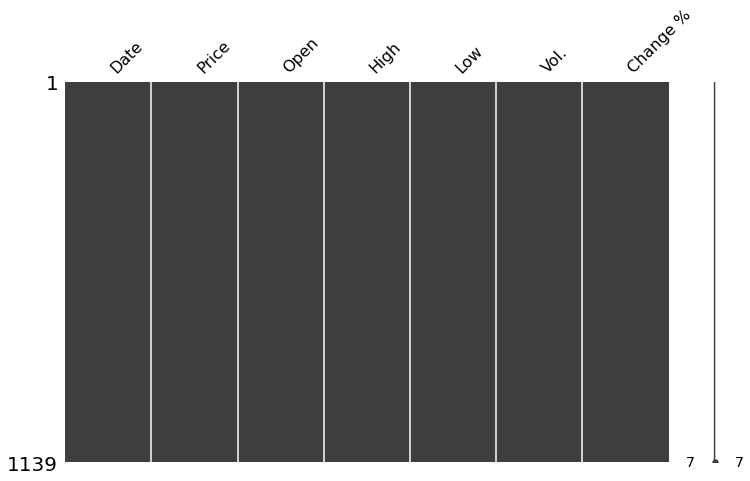

In [6]:
#checking for nan values
mno.matrix(df,figsize=(12,7))

**Task 1: Move the 'Price' column after the 'Low' column.**

In [7]:
df=df[['Date','Open','High','Low','Price','Vol.','Change %']]

**Task 2: Rename the 'Price' column to 'Close'**

In [8]:
df=df.rename(columns={"Price": "Close"})

In [9]:
df.head()

,Date,Open,High,Low,Close,Vol.,Change %
0,2-Jan-18,161.78,161.78,161.18,161.28,485.60K,-0.25%
1,3-Jan-18,161.26,161.82,161.20,161.58,604.24K,0.19%
2,4-Jan-18,161.44,161.75,161.26,161.59,640.61K,0.01%
3,5-Jan-18,161.70,161.87,161.50,161.59,467.09K,0.00%
4,8-Jan-18,161.64,162.04,161.39,161.80,454.69K,0.13%


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

**Task 3: Calculate the Average True Range(ATR) based on the data**



In [11]:
import datetime as dt
high_low = df['High'] - df['Low']
high_close = np.abs(df['High'] - df['Close'].shift())
low_close = np.abs(df['Low'] - df['Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
atr = true_range.rolling(14).sum()/14

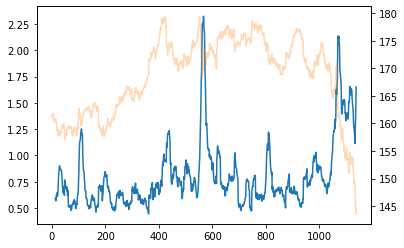

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
atr.plot(ax=ax)
df['Close'].plot(ax=ax, secondary_y=True, alpha=0.3)
plt.show()

**Task 4: Calculate 'Moving Standard Deviation' for both 'Close' as well as 'ATR'.**

In [13]:
df['close_std'] = df['Close'].rolling(window=14).std()
df.tail()

,Date,Open,High,Low,Close,Vol.,Change %,Year,Month,close_std
1134,2022-06-09,148.69,149.43,147.32,147.80,1.04M,-0.79%,2022,6,2.131116
1135,2022-06-10,147.74,148.51,146.61,146.98,956.29K,-0.55%,2022,6,2.351351
1136,2022-06-13,146.71,147.19,144.19,145.18,1.10M,-1.22%,2022,6,2.622317
1137,2022-06-14,144.65,145.58,142.29,143.59,1.26M,-1.10%,2022,6,2.943058
1138,2022-06-15,142.73,145.51,142.25,144.61,1.29M,0.71%,2022,6,3.002452


**Task 5: Create simple Front end that shows a candlestick chart along with an overlaid atr chart**

In [19]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [ ]:
-